In [132]:
# загружаем необходимые библиотеки

import pandas as pd
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import levene
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# для первой половины заданий будем работать с task_1
task_1 = pd.read_csv('5_task_1.csv')

In [107]:
# для второй половины заданий будем работать с task_2
task_2 = pd.read_csv('5_task_2.csv')

In [120]:
task_1.head()

id group  events
0  16046     A      14
1  18712     A      41
2   3268     A      30
3  22633     A      37
4  28071     A      38

In [118]:
task_1.isna().sum()

id        0
group     0
events    0
dtype: int64

In [121]:
task_1.shape

(30000, 3)

In [122]:
task_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.2+ KB


### Итак, первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего. Всего пользователям показывались три варианта:
### A – прямоугольные 16:9
### B – квадратные
### C – прямоугольные 12:4
### Для статистического теста воспользуемся ANOVA


In [108]:
# сохраним в переменную "А" данные по группам А
A = task_1.query('group == "A"')

In [109]:
# сохраним в переменную "В" данные по группам В
B = task_1.query('group == "B"')

In [110]:
# сохраним в переменную "С" данные по группам С
C = task_1.query('group == "C"')

### Проверим, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена. 

In [111]:
scipy.stats.levene(A.events, B.events, C.events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

### Pvalue > 0.05 , значит дисперсии внутри групп являются примерно одинаковыми (гомогенными) 

### Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. 

In [113]:
# тест группы А
scipy.stats.shapiro(A.events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


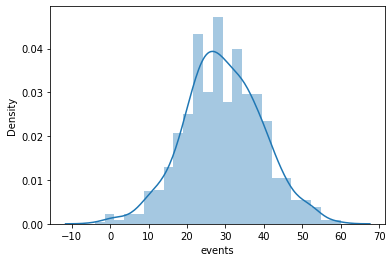

In [35]:
sns.distplot(A.events.sample(1000, random_state=17))

In [114]:
# тест группы B
scipy.stats.shapiro(B.events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


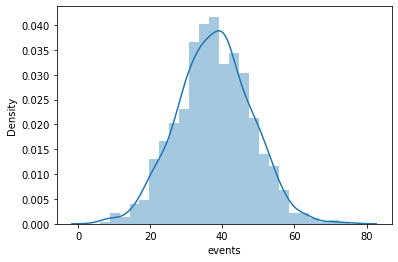

In [39]:
sns.distplot(B.events.sample(1000, random_state=17))

In [115]:
# тест группы C
scipy.stats.shapiro(C.events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


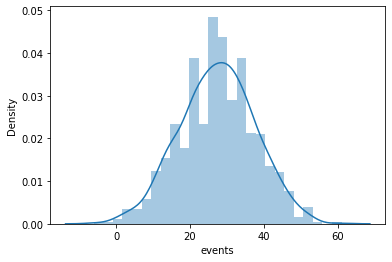

In [41]:
sns.distplot(C.events.sample(1000, random_state=17))

### Все три группы показали в тесте Шапиро-Уилка Pvalue > 0.05. Данные распределенны нормально, продолжаем тест.

### Проводим тест 

In [47]:
stats.f_oneway(A.events, B.events, C.events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

### Для сравнения средних я использую ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ . Значение статистики равно 2886, а р-уровень значимости составил 0.

### Теперь используем критерий Тьюки и определим, между какими группами есть статистически значимые различия. 

In [50]:
print(pairwise_tukeyhsd(task_1.events, task_1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


### Во всех группах есть статистически значимые различия.

In [52]:
A.events.mean()

29.5796

In [53]:
B.events.mean()

37.6136

In [54]:
C.events.mean()

27.4703

### Основываяся на результатах теста, рекомендация применять B – Квадратные.

In [123]:
task_2.head()

id group segment  events  combination
0  83440  test    high    78.0  test \ high
1  96723  test    high    71.0  test \ high
2  68719  test    high    80.0  test \ high
3  50399  test    high    80.0  test \ high
4  95613  test    high    78.0  test \ high

In [124]:
task_2.isna().sum()

id             0
group          0
segment        0
events         0
combination    0
dtype: int64

In [125]:
task_2.shape

(100000, 5)

In [126]:
task_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           100000 non-null  int64  
 1   group        100000 non-null  object 
 2   segment      100000 non-null  object 
 3   events       100000 non-null  float64
 4   combination  100000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.8+ MB


### Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента. Использую многофакторный дисперсионный анализ в данном случае.

In [55]:
test = task_2.query('group =="test"')

In [56]:
control = task_2.query('group =="control"')

In [58]:
task_2.group.unique()

array(['test', 'control'], dtype=object)

In [60]:
task_2.segment.unique()

array(['high', 'low'], dtype=object)

### Для начала визуализируем распределение events для контрольной и тестовой групп.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


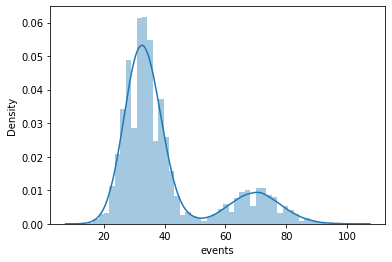

In [62]:
sns.distplot(test.events)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


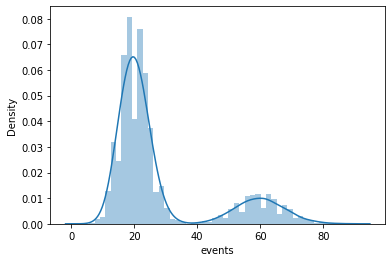

In [63]:
sns.distplot(control.events)

### Посчитаем среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

In [74]:
task_2.query('group == "test" and segment == "high"').events.describe()

count    10000.000000
mean        69.938500
std          8.403974
min         40.000000
25%         64.000000
50%         70.000000
75%         76.000000
max        102.000000
Name: events, dtype: float64

In [75]:
task_2.query('group == "test" and segment == "low"').events.describe()

count    40000.000000
mean        33.025925
std          5.720845
min         13.000000
25%         29.000000
50%         33.000000
75%         37.000000
max         59.000000
Name: events, dtype: float64

In [83]:
task_2.query('group == "control" and segment == "high"').events.describe()

count    10000.000000
mean        59.970800
std          7.805347
min         31.000000
25%         55.000000
50%         60.000000
75%         65.000000
max         89.000000
Name: events, dtype: float64

In [77]:
task_2.query('group == "control" and segment == "low"').events.describe()

count    40000.000000
mean        20.031575
std          4.473576
min          4.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         41.000000
Name: events, dtype: float64

### Выбираем формулу для модели. Напомним, что мы хотим проверить эффект нескольких переменных – group и segment – на events, с взаимодействием факторов

In [88]:
formula = 'events ~ segment + group + segment:group'
model = ols(formula, task_2).fit()
aov_table = anova_lm(model, typ=2)

In [89]:
aov_table

sum_sq       df              F         PR(>F)
segment        2.362480e+07      1.0  689756.377484   0.000000e+00
group          3.837195e+06      1.0  112031.864119   0.000000e+00
segment:group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN

### Используем критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия. В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в pairwise_tukey:

In [116]:
# создаем коллонку ['combination']
task_2['combination'] = task_2['group'] + ' \ ' + task_2['segment']

In [93]:
print(pairwise_tukeyhsd(task_2.events, task_2['combination']))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


### Визуализируем результаты теста 

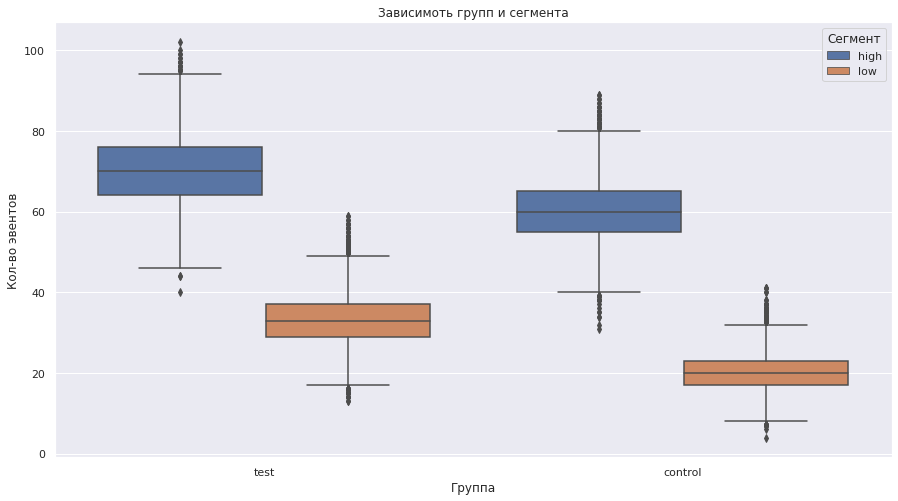

In [134]:
sns.boxplot(x = 'group', y = 'events', hue = 'segment', data = task_2)
plt.title('Зависимоть групп и сегмента')
plt.xlabel('Группа')
plt.ylabel('Кол-во эвентов')
plt.legend(title = 'Сегмент')
sns.set(rc = {'figure.figsize':(20,8)})

### Фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – ЗНАЧИМО. Судя по графику, для всех групп среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ.